# Main correlation matrix

During the feature selection part of the model,
we figured out that very different sets of features were chosen
in different runs. Hence, a decision was made to search
or highly correlated features among all the features
in the dataset.

The following code looks for highly correlated features in the
model's input data.

In [13]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [9]:
import os
from pathlib import Path
from dotenv import load_dotenv

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from statsmodels.stats.outliers_influence import variance_inflation_factor

from utils import get_clean_dataset

In [10]:
# Whether or not to save the figures
save_fig = True

In [11]:
output_dir = (
    Path(os.getenv("STORM_DATA_DIR")) / "analysis/01_baseline_model_fji/output"
)

In [14]:
df = get_clean_dataset()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tdowning/Insync/tristan.downing@humdata.org/Google Drive - Shared drives/Predictive Analytics/Collaborations/ISI/data/analysis/01_baseline_model_fji/input/combined_input_data.csv'

## Correlations

In [17]:
# TODO: This should be run separately
# The correlation Matrix is also done for the input data where
# the damage value is greater than 10.
# df = df[df['DAM_perc_dmg'] > 10]
# df

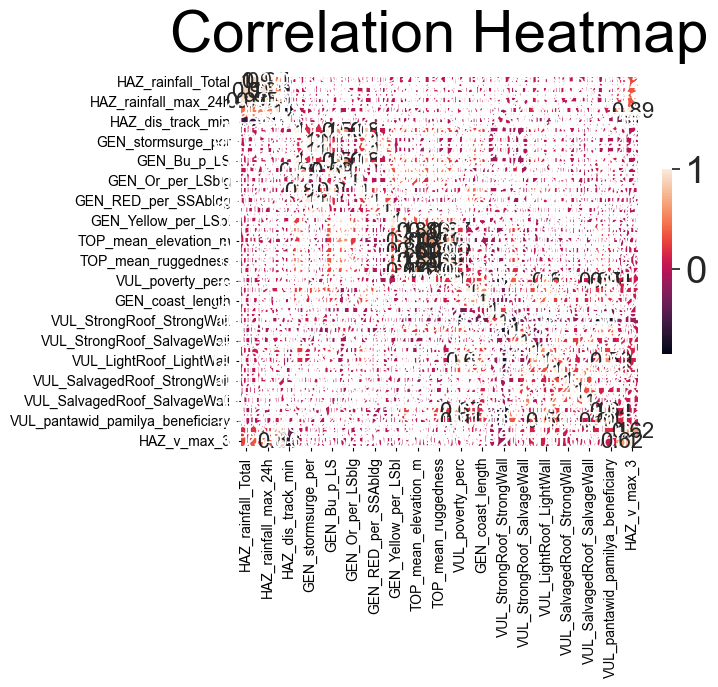

In [19]:
# get the correlation matrix
fig, ax = plt.subplots()

corrMatrix = df.corr(numeric_only=True)

plt.rcParams["figure.figsize"] = (48, 48)

sn.set(font_scale=2.5)
heatmap = sn.heatmap(
    corrMatrix, annot=True, cbar_kws={"shrink": 0.5}, annot_kws={"size": 16}
)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 42}, pad=18)

if save_fig:
    fig.savefig(output_dir / "corr_matrix.png", format="png")

plt.show()

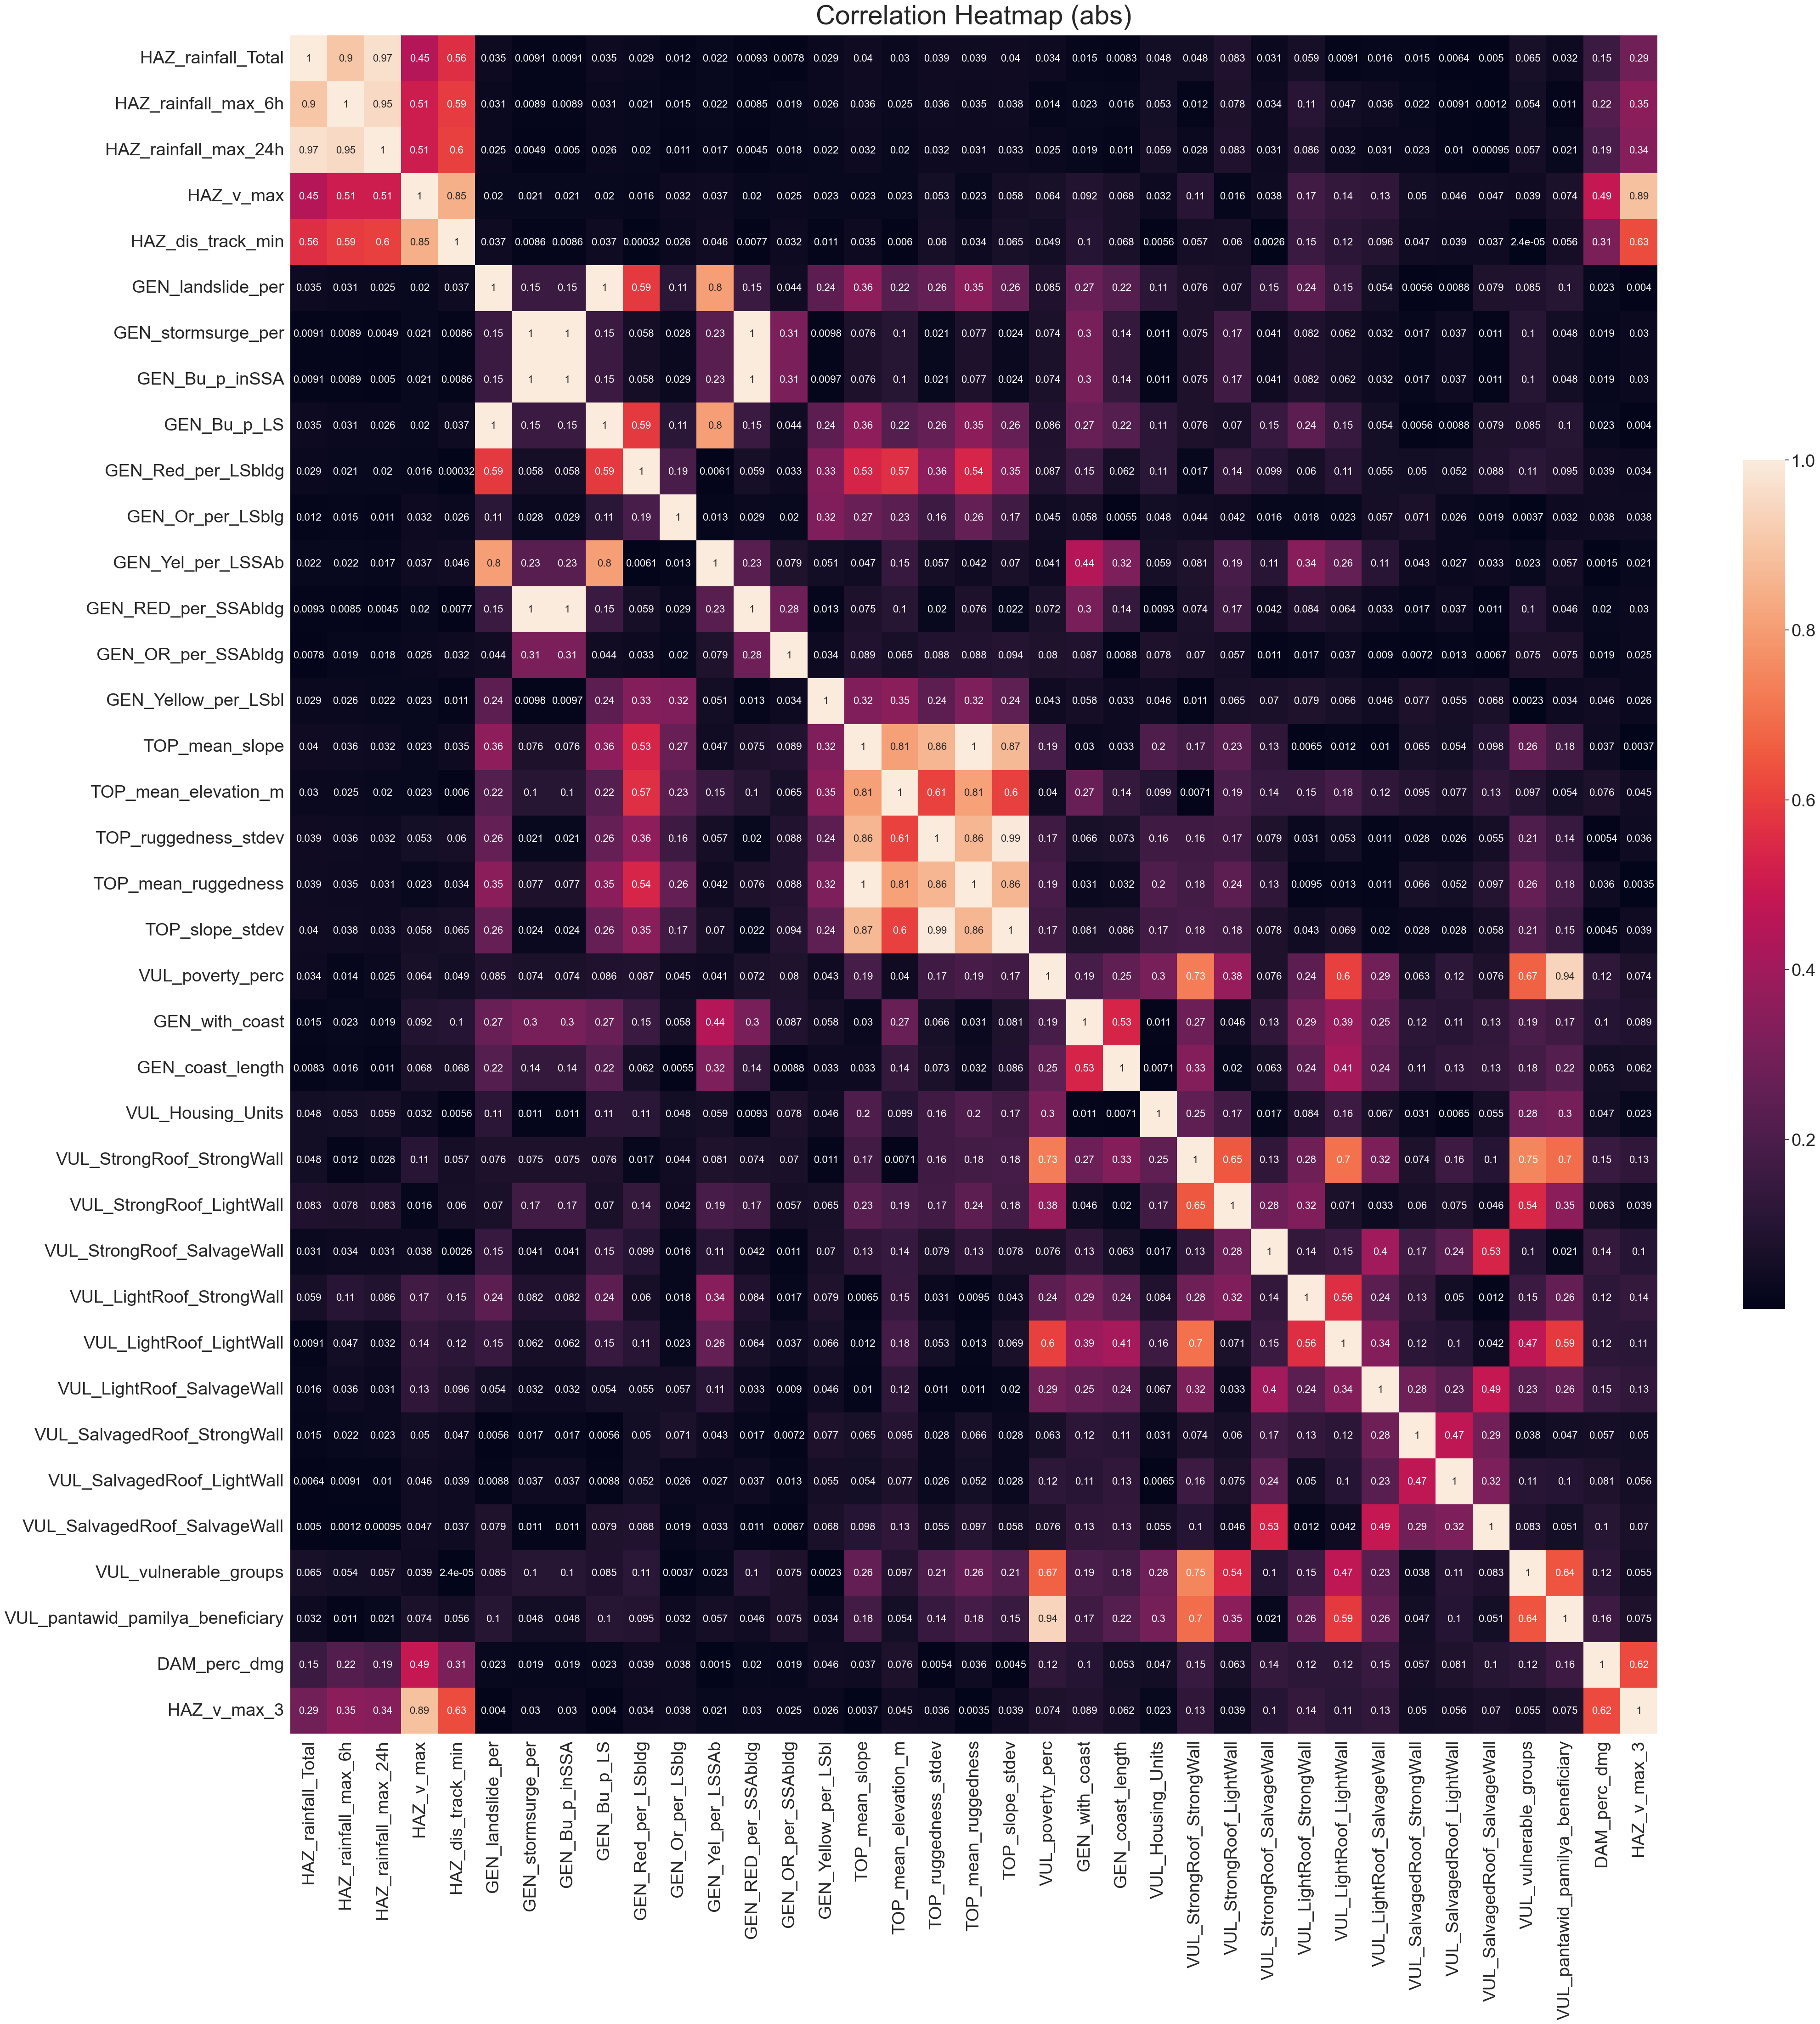

In [21]:
# get the correlation matrix (creating a square matrix
# with dimensions equal to the number of features)
# get the absolute value of correlation

fig, ax = plt.subplots()

corrMatrix_abs = df.corr(numeric_only=True).abs()

plt.rcParams["figure.figsize"] = (48, 48)

sn.set(font_scale=2.5)
heatmap = sn.heatmap(
    corrMatrix_abs,
    annot=True,
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 16},
)
heatmap.set_title(
    "Correlation Heatmap (abs)", fontdict={"fontsize": 42}, pad=18
)

if save_fig:
    fig.savefig(output_dir / "corr_matrix_abs.png", format="png")

plt.show()

In [23]:
pair = (
    corrMatrix_abs.where(
        np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(bool)
    )
    .stack()
    .sort_values(ascending=True)
)
pairs = pair[pair.gt(0.8)]
print(pairs)

GEN_Bu_p_LS           GEN_Yel_per_LSSAb                   0.804135
GEN_landslide_per     GEN_Yel_per_LSSAb                   0.804226
TOP_mean_slope        TOP_mean_elevation_m                0.807596
TOP_mean_elevation_m  TOP_mean_ruggedness                 0.809930
HAZ_v_max             HAZ_dis_track_min                   0.847090
TOP_ruggedness_stdev  TOP_mean_ruggedness                 0.859740
TOP_mean_slope        TOP_ruggedness_stdev                0.861766
TOP_mean_ruggedness   TOP_slope_stdev                     0.863112
TOP_mean_slope        TOP_slope_stdev                     0.867246
HAZ_v_max             HAZ_v_max_3                         0.889916
HAZ_rainfall_Total    HAZ_rainfall_max_6h                 0.901782
VUL_poverty_perc      VUL_pantawid_pamilya_beneficiary    0.938045
HAZ_rainfall_max_6h   HAZ_rainfall_max_24h                0.949992
HAZ_rainfall_Total    HAZ_rainfall_max_24h                0.971342
TOP_ruggedness_stdev  TOP_slope_stdev                     0.99

In [24]:
# Correlation matrix will be mirror image(all the diagonal elements=1).
# does not matter that we select the upper triangular or
# lower triangular part of the correlation matrix.

upper_tri = corrMatrix_abs.where(
    np.triu(np.ones(corrMatrix_abs.shape), k=1).astype(bool)
)

In [25]:
drop_value = 0.80
to_drop = [
    column
    for column in upper_tri.columns
    if any(upper_tri[column] > drop_value)
]
print(to_drop)

['HAZ_rainfall_max_6h', 'HAZ_rainfall_max_24h', 'HAZ_dis_track_min', 'GEN_Bu_p_inSSA', 'GEN_Bu_p_LS', 'GEN_Yel_per_LSSAb', 'GEN_RED_per_SSAbldg', 'TOP_mean_elevation_m', 'TOP_ruggedness_stdev', 'TOP_mean_ruggedness', 'TOP_slope_stdev', 'VUL_pantawid_pamilya_beneficiary', 'HAZ_v_max_3']


In [26]:
df = df.drop(df[to_drop], axis=1)
# print(df.head())

# %%
df = df.drop("typhoon", axis=1)
df

HAZ_rainfall_Total  HAZ_v_max  GEN_landslide_per  GEN_stormsurge_per  \
0              185.828571  55.032241               2.64                6.18   
2                8.818750   8.728380               0.06                0.00   
4               24.175000  10.945624               1.52                1.28   
6               14.930000  12.108701               0.00                0.00   
7               13.550000  10.660943               5.52                0.36   
...                   ...        ...                ...                 ...   
25835            9.700000   8.136932               1.80                6.25   
25837           17.587500   9.818999               0.00                0.00   
25838           11.487500  15.791907               0.06                0.09   
25839           11.600000  13.867145               0.00                0.00   
25841           32.305556  15.647639               4.15                3.05   

       GEN_Red_per_LSbldg  GEN_Or_per_LSblg  GEN_OR_per_SSAbldg  \
0                    1.17              0.03                0.00   
2                    0.06              0.00                0.00   
4                    0.02              0.00                0.00   
6                    0.00              0.00                0.00   
7                    0.00              0.00                0.00   
...                   ...               ...                 ...   
25835                0.12              0.00                0.00   
25837                0.00              0.00                0.00   
25838                0.06              0.00                0.00   
25839                0.00              0.00                0.00   
25841                0.00              0.00                0.13   

       GEN_Yellow_per_LSbl  TOP_mean_slope  VUL_poverty_perc  ...  \
0                     0.06           16.48             11.34  ...   
2                     0.00            8.73              6.09  ...   
4                     0.00            4.58              7.87  ...   
6                     0.00            8.77              6.43  ...   
7                     0.00            9.83              9.38  ...   
...                    ...             ...               ...  ...   
25835                 0.00            6.67              6.88  ...   
25837                 0.00            0.79              3.09  ...   
25838                 0.09            7.70              2.36  ...   
25839                 0.00           11.17              4.56  ...   
25841                 0.00            2.08              7.40  ...   

       VUL_StrongRoof_LightWall  VUL_StrongRoof_SalvageWall  \
0                      8.211552                    0.097425   
2                     33.639236                    0.850008   
4                     22.963749                    0.197179   
6                     16.179723                    0.279362   
7                     32.522996                    0.065703   
...                         ...                         ...   
25835                 19.563863                    0.186916   
25837                 13.456446                    0.209059   
25838                 22.347376                    0.202748   
25839                 29.584121                    0.000000   
25841                  3.644103                    0.031146   

       VUL_LightRoof_StrongWall  VUL_LightRoof_LightWall  \
0                      2.533055                41.892832   
2                      1.218595                13.645253   
4                      0.667374                15.592295   
6                      0.675125                 7.100454   
7                      0.821288                30.354796   
...                         ...                      ...   
25835                  3.613707                32.492212   
25837                  0.383275                 4.703833   
25838                  0.090110                 3.063753   
25839                  0.094518                 3.119093   
25841  

In [27]:
df.columns.tolist()

['HAZ_rainfall_Total',
 'HAZ_v_max',
 'GEN_landslide_per',
 'GEN_stormsurge_per',
 'GEN_Red_per_LSbldg',
 'GEN_Or_per_LSblg',
 'GEN_OR_per_SSAbldg',
 'GEN_Yellow_per_LSbl',
 'TOP_mean_slope',
 'VUL_poverty_perc',
 'GEN_with_coast',
 'GEN_coast_length',
 'VUL_Housing_Units',
 'VUL_StrongRoof_StrongWall',
 'VUL_StrongRoof_LightWall',
 'VUL_StrongRoof_SalvageWall',
 'VUL_LightRoof_StrongWall',
 'VUL_LightRoof_LightWall',
 'VUL_LightRoof_SalvageWall',
 'VUL_SalvagedRoof_StrongWall',
 'VUL_SalvagedRoof_LightWall',
 'VUL_SalvagedRoof_SalvageWall',
 'VUL_vulnerable_groups',
 'DAM_perc_dmg']

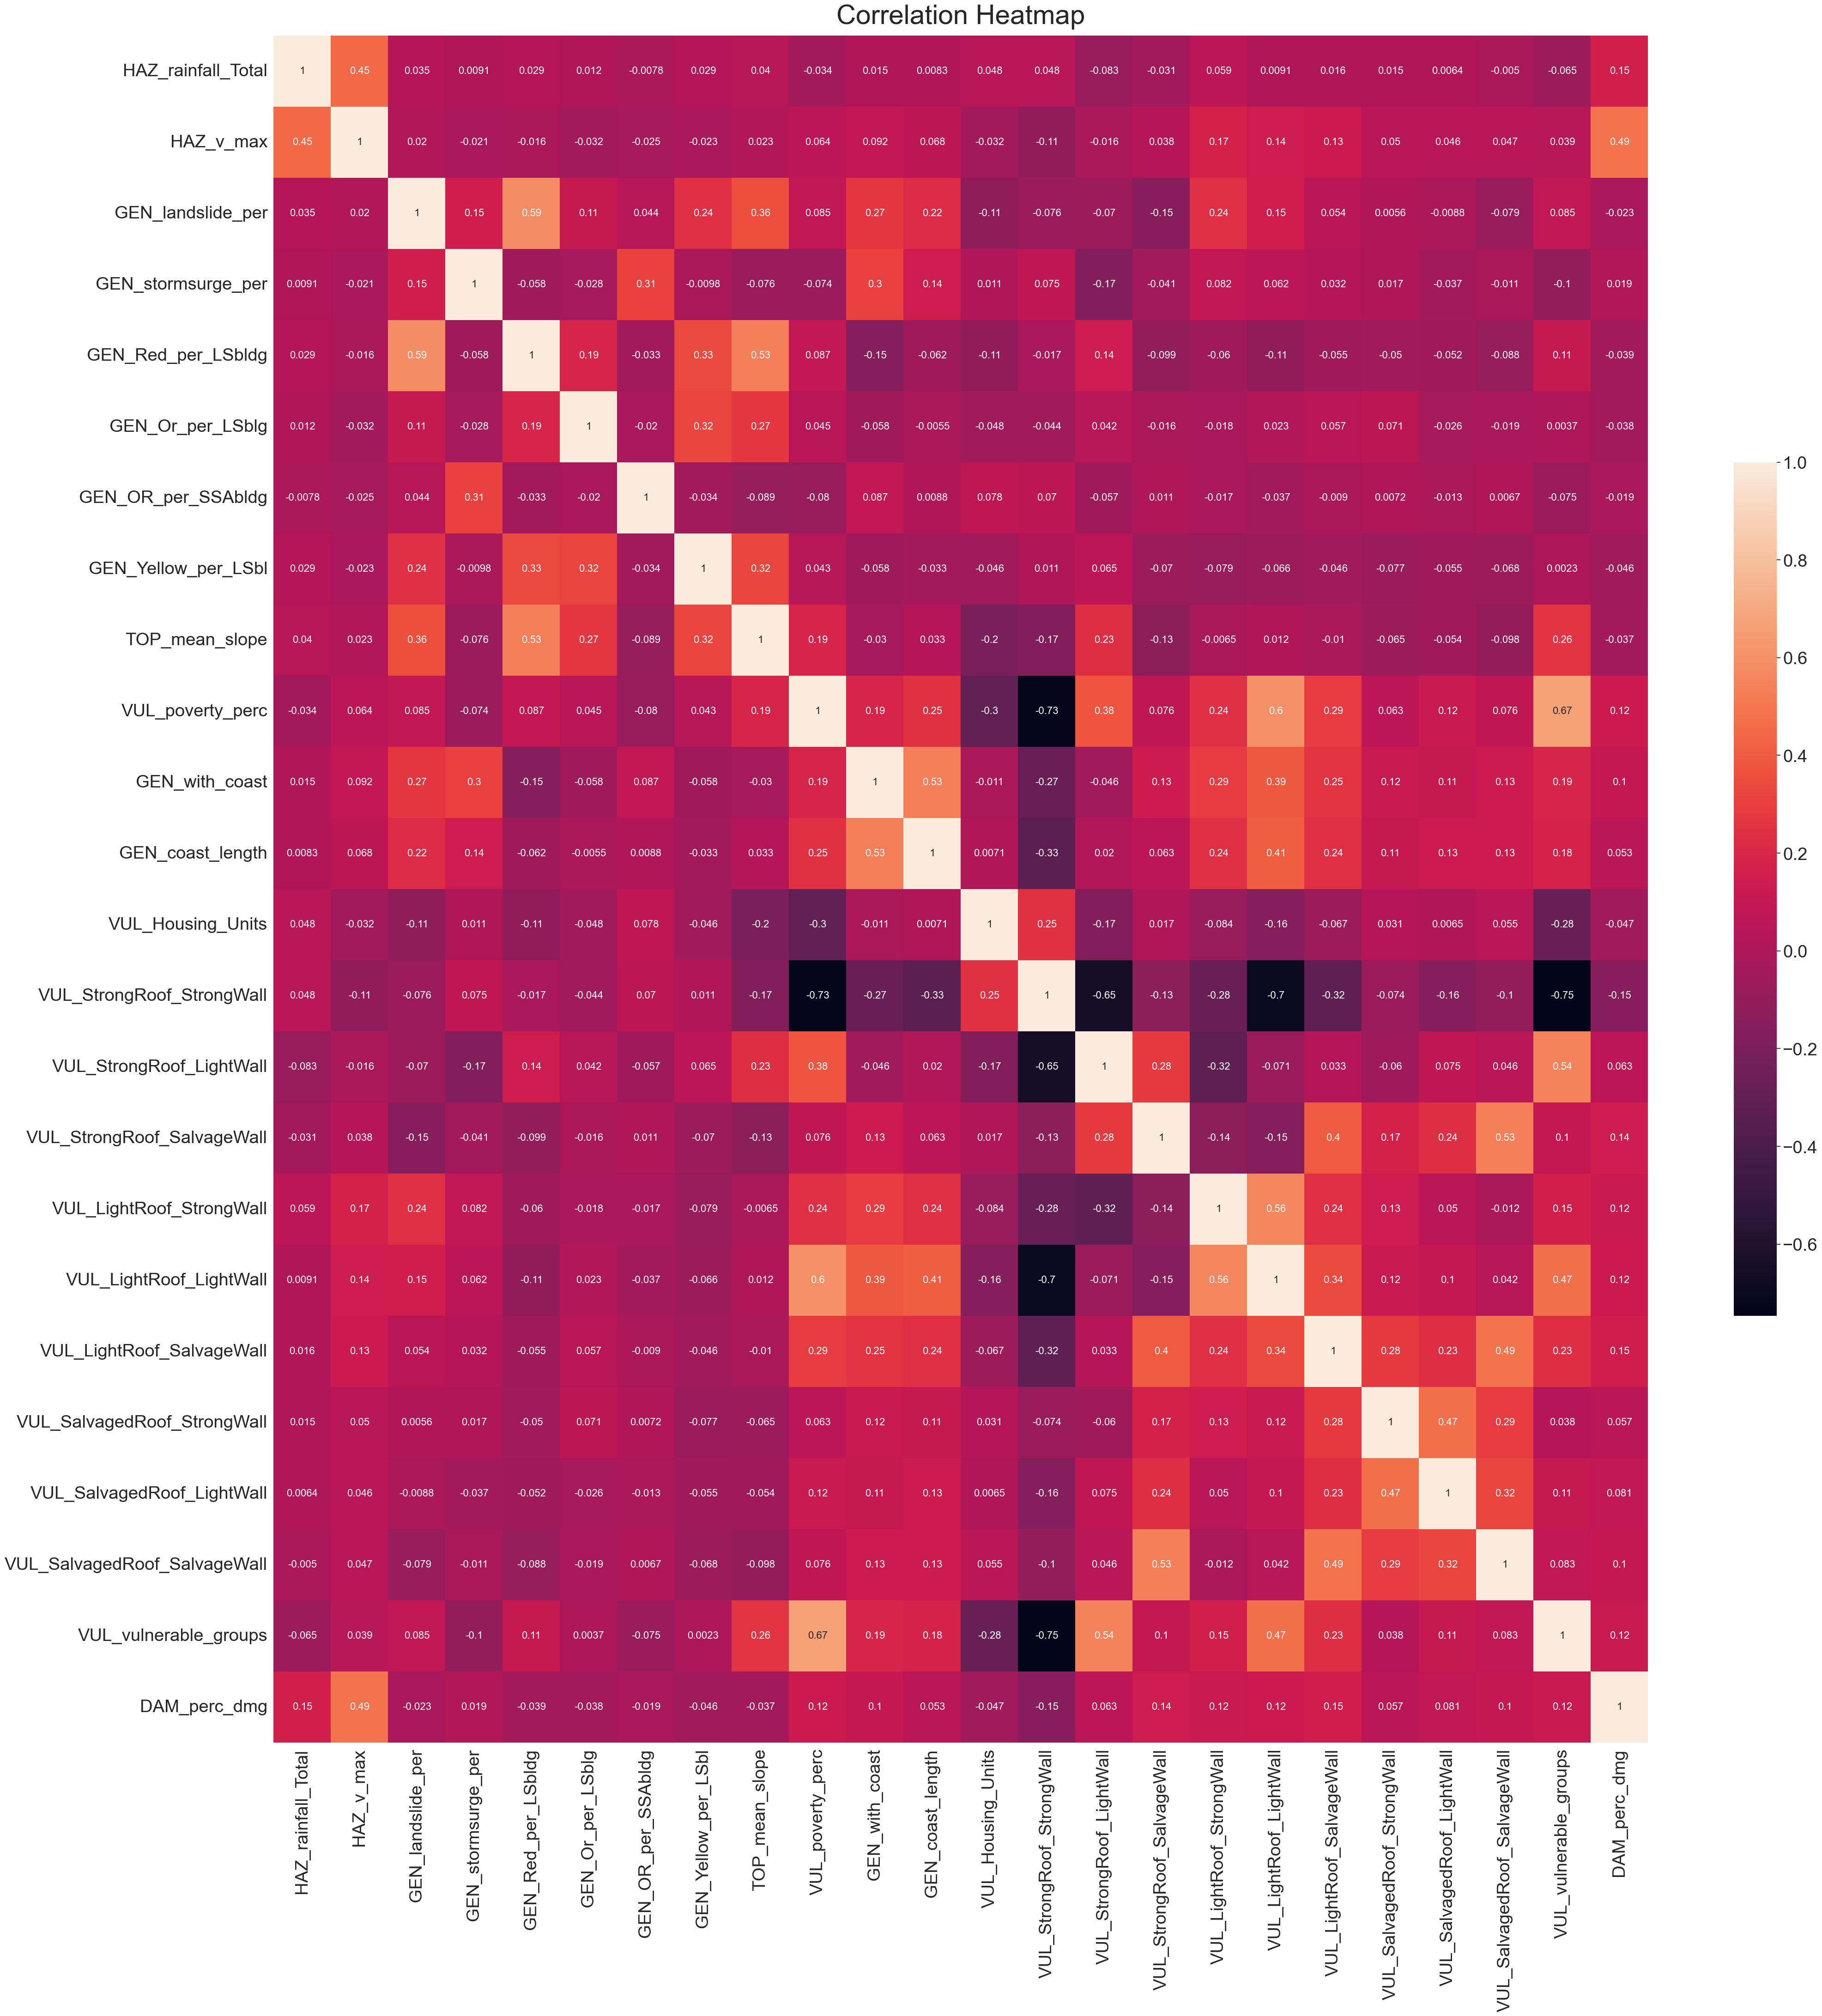

In [28]:
fig, ax = plt.subplots()

corrMatrix = df.corr(numeric_only=True)
# print (corrMatrix)

plt.rcParams["figure.figsize"] = (48, 48)
# plt.figure(figsize=(36,36))

sn.set(font_scale=2.5)
heatmap = sn.heatmap(
    corrMatrix, annot=True, cbar_kws={"shrink": 0.5}, annot_kws={"size": 16}
)
heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 42}, pad=18)

if save_fig:
    fig.savefig(output_dir / "corr_matrix_drop.png", format="png")

plt.show()

In [29]:
names = df.columns.tolist()
names

display(df[names])

HAZ_rainfall_Total  HAZ_v_max  GEN_landslide_per  GEN_stormsurge_per  \
0              185.828571  55.032241               2.64                6.18   
2                8.818750   8.728380               0.06                0.00   
4               24.175000  10.945624               1.52                1.28   
6               14.930000  12.108701               0.00                0.00   
7               13.550000  10.660943               5.52                0.36   
...                   ...        ...                ...                 ...   
25835            9.700000   8.136932               1.80                6.25   
25837           17.587500   9.818999               0.00                0.00   
25838           11.487500  15.791907               0.06                0.09   
25839           11.600000  13.867145               0.00                0.00   
25841           32.305556  15.647639               4.15                3.05   

       GEN_Red_per_LSbldg  GEN_Or_per_LSblg  GEN_OR_per_SSAbldg  \
0                    1.17              0.03                0.00   
2                    0.06              0.00                0.00   
4                    0.02              0.00                0.00   
6                    0.00              0.00                0.00   
7                    0.00              0.00                0.00   
...                   ...               ...                 ...   
25835                0.12              0.00                0.00   
25837                0.00              0.00                0.00   
25838                0.06              0.00                0.00   
25839                0.00              0.00                0.00   
25841                0.00              0.00                0.13   

       GEN_Yellow_per_LSbl  TOP_mean_slope  VUL_poverty_perc  ...  \
0                     0.06           16.48             11.34  ...   
2                     0.00            8.73              6.09  ...   
4                     0.00            4.58              7.87  ...   
6                     0.00            8.77              6.43  ...   
7                     0.00            9.83              9.38  ...   
...                    ...             ...               ...  ...   
25835                 0.00            6.67              6.88  ...   
25837                 0.00            0.79              3.09  ...   
25838                 0.09            7.70              2.36  ...   
25839                 0.00           11.17              4.56  ...   
25841                 0.00            2.08              7.40  ...   

       VUL_StrongRoof_LightWall  VUL_StrongRoof_SalvageWall  \
0                      8.211552                    0.097425   
2                     33.639236                    0.850008   
4                     22.963749                    0.197179   
6                     16.179723                    0.279362   
7                     32.522996                    0.065703   
...                         ...                         ...   
25835                 19.563863                    0.186916   
25837                 13.456446                    0.209059   
25838                 22.347376                    0.202748   
25839                 29.584121                    0.000000   
25841                  3.644103                    0.031146   

       VUL_LightRoof_StrongWall  VUL_LightRoof_LightWall  \
0                      2.533055                41.892832   
2                      1.218595                13.645253   
4                      0.667374                15.592295   
6                      0.675125                 7.100454   
7                      0.821288                30.354796   
...                         ...                      ...   
25835                  3.613707                32.492212   
25837                  0.383275                 4.703833   
25838                  0.090110                 3.063753   
25839                  0.094518                 3.119093   
25841  

In [30]:
"""
VIF is another method for finding highly correlated features
if there is still in existence.
VIF method, picks each feature and regresses it against all of
the other features so VIF value for a feature
demonstrates the correlation of that feature in total with all
the other ones, and not only with one specific feature.
Normally if the estimated VIF value for a feature is greater
than 7 so it can be considered a highly correlated feature.
"""

# Implementing VIF

# The independent variables set
X = df[names]
# Creating VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i) for i in range(len(X.columns))
]


print(vif_data)

                         feature        VIF
0             HAZ_rainfall_Total   2.762248
1                      HAZ_v_max   4.766043
2              GEN_landslide_per   3.072507
3             GEN_stormsurge_per   1.432910
4             GEN_Red_per_LSbldg   2.596324
5               GEN_Or_per_LSblg   1.261555
6             GEN_OR_per_SSAbldg   1.140655
7            GEN_Yellow_per_LSbl   1.470278
8                 TOP_mean_slope   4.707812
9               VUL_poverty_perc  13.175166
10                GEN_with_coast   4.234575
11              GEN_coast_length   2.143848
12             VUL_Housing_Units   1.673781
13     VUL_StrongRoof_StrongWall   5.466895
14      VUL_StrongRoof_LightWall   7.193891
15    VUL_StrongRoof_SalvageWall   2.574345
16      VUL_LightRoof_StrongWall   2.279889
17       VUL_LightRoof_LightWall   6.669221
18     VUL_LightRoof_SalvageWall   2.248221
19   VUL_SalvagedRoof_StrongWall   1.543744
20    VUL_SalvagedRoof_LightWall   1.589639
21  VUL_SalvagedRoof_SalvageWall

In [31]:
vif_data_sort = vif_data
vif_data_sort = vif_data.sort_values("VIF")
vif_data_sort = vif_data_sort.reset_index(drop=True)
display(vif_data_sort)

feature        VIF
0             GEN_OR_per_SSAbldg   1.140655
1               GEN_Or_per_LSblg   1.261555
2             GEN_stormsurge_per   1.432910
3                   DAM_perc_dmg   1.467675
4            GEN_Yellow_per_LSbl   1.470278
5    VUL_SalvagedRoof_StrongWall   1.543744
6     VUL_SalvagedRoof_LightWall   1.589639
7              VUL_Housing_Units   1.673781
8   VUL_SalvagedRoof_SalvageWall   2.127463
9               GEN_coast_length   2.143848
10     VUL_LightRoof_SalvageWall   2.248221
11      VUL_LightRoof_StrongWall   2.279889
12    VUL_StrongRoof_SalvageWall   2.574345
13            GEN_Red_per_LSbldg   2.596324
14            HAZ_rainfall_Total   2.762248
15             GEN_landslide_per   3.072507
16                GEN_with_coast   4.234575
17                TOP_mean_slope   4.707812
18                     HAZ_v_max   4.766043
19     VUL_StrongRoof_StrongWall   5.466895
20       VUL_LightRoof_LightWall   6.669221
21      VUL_StrongRoof_LightWall   7.193891
22         VUL_vulnerable_groups   9.181807
23              VUL_poverty_perc  13.175166